In [1]:
from matplotlib import pyplot as plt
import numpy as np

from hazma.scalar_mediator import ScalarMediator
from hazma.vector_mediator import VectorMediator
from hazma.parameters import muon_mass as mmu
from utilities import latex_text_width_1col

**Generates plots of the muon FSR spectrum for the scalar and vector-mediator models.**

In [2]:
def ap_approx(e_gam, mass, e_cm):
    """Altarelli-Parisi approximation of FSR spectrum.
    """
    x0 = 2. * e_gam / e_cm
    eps = 2 * mass / e_cm
    pre_fac = 1.0 / (137.0 * np.pi) * 2. / e_cm
    split_func = (1. + (1. - x0)**2) / x0
    log_sup = (-1. + np.log(4. * (1 - x0) / eps**2))

    return pre_fac * split_func * log_sup

In [3]:
# As noted in the text, the specific parameter values do not impact the
# FSR spectra
sm = ScalarMediator(mx=100, ms=1e3, gsxx=1., gsff=1., gsGG=1., gsFF=1.,
                    lam=246e3)
vm = VectorMediator(mx=100, mv=1e3, gvxx=1., gvuu=1., gvdd=-1., gvss=0.,
                    gvee=0., gvmumu=1.)

# Center of mass energies
e_cms = 2 * np.array([110., 125., 150., 250.])
# Photon energies
e_gams = np.geomspace(1, 300, num=200)

/Users/acoogan/.pyenv/versions/miniconda3-latest/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


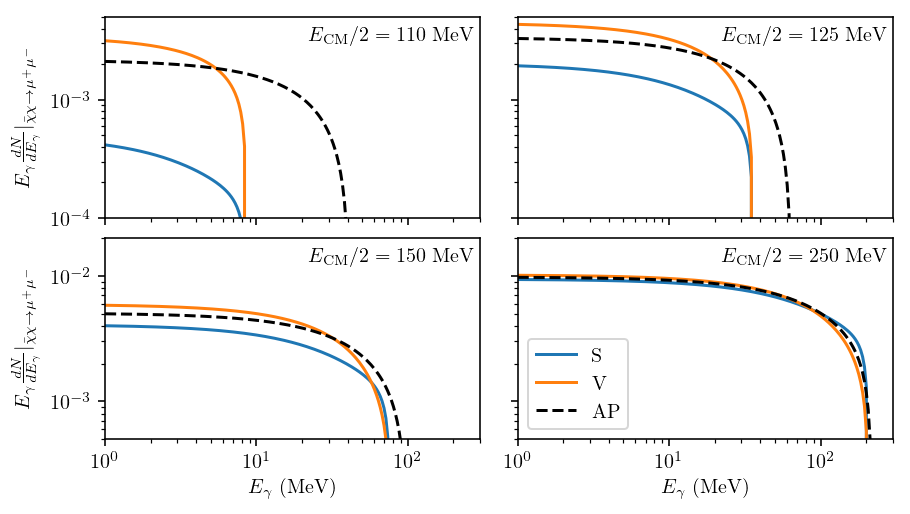

In [4]:
fig, axs = plt.subplots(
    2, 2, sharex='col', sharey='row',
    figsize=(latex_text_width_1col, 0.55 * latex_text_width_1col))

for i, ax in enumerate(axs.flatten()):
    e_cm = e_cms[i]

    # Plot spectra
    ax.loglog(e_gams, e_gams * sm.dnde_mumu(e_gams, e_cm, "fsr"), label="S")
    ax.loglog(e_gams, e_gams * vm.dnde_mumu(e_gams, e_cm, "fsr"), label="V")

    # Plot AP approximation
    ax.loglog(e_gams, e_gams * ap_approx(e_gams, mmu, e_cm), '--k', label="AP")

    # Formatting
    ax.set_xlim(e_gams[[0, -1]])
    if i in [0, 1]:
        ax.text(2.2e1, 3e-3, r"$E_{\mathrm{CM}}/2 = %i$ MeV" % (0.5 * e_cm),
                fontsize=10)
        ax.set_ylim(1e-4, 5e-3)
    else:
        ax.text(2.2e1, 1.25e-2, r"$E_{\mathrm{CM}}/2 = %i$ MeV" % (0.5 * e_cm),
                fontsize=10)
        ax.set_ylim(5e-4, 2e-2)
    if i == 3:
        ax.legend(loc="lower left", fontsize=10)
    if i in [2, 3]:
        ax.set_xlabel(r"$E_\gamma$ (MeV)", fontsize=10)
    if i in [0, 2]:
        ax.set_ylabel(r"$E_\gamma \frac{dN}{dE_\gamma} |_{\bar{\chi}\chi \to \mu^+ \mu^-}$",
                      fontsize=10)

fig.subplots_adjust(hspace=0.1, wspace=0.1)
plt.savefig("figures/muon_fsr.pdf", bbox_inches="tight")
plt.show()